## **Importing Libraries**

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## **Loading Dataset and Understanding its Structure**

In [2]:
insurance_data = pd.read_csv("/content/insurance.csv")

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Checking Structure of the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## **Data Cleaning Operations**

In [5]:
# Checking Missing Values
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
# Checking Duplicates
insurance_data.duplicated().sum()

1

In [7]:
# Dropping Duplicate value
insurance_data.drop_duplicates(inplace = True)

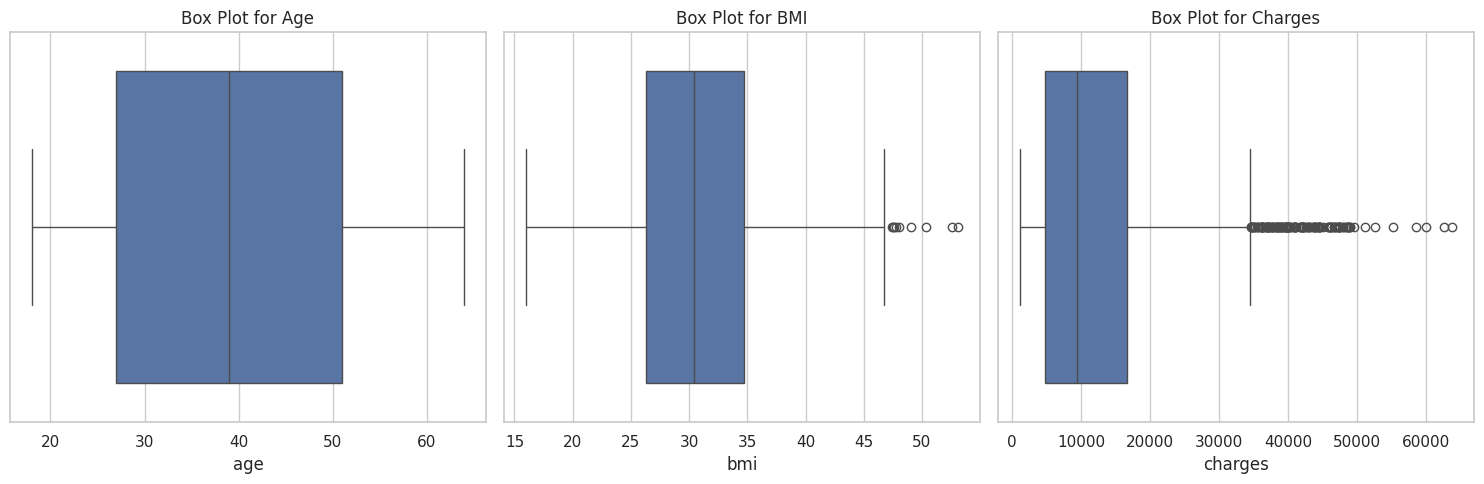

In [8]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure with subplots for each of the columns
plt.figure(figsize=(15, 5))

# Box plot for Age
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.boxplot(x=insurance_data['age'])
plt.title('Box Plot for Age')

# Box plot for BMI
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.boxplot(x=insurance_data['bmi'])
plt.title('Box Plot for BMI')

# Box plot for Charges
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.boxplot(x=insurance_data['charges'])
plt.title('Box Plot for Charges')

# Adjust layout
plt.tight_layout()
plt.show()

## **Exploratory Data Analysis**

In [9]:
insurance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


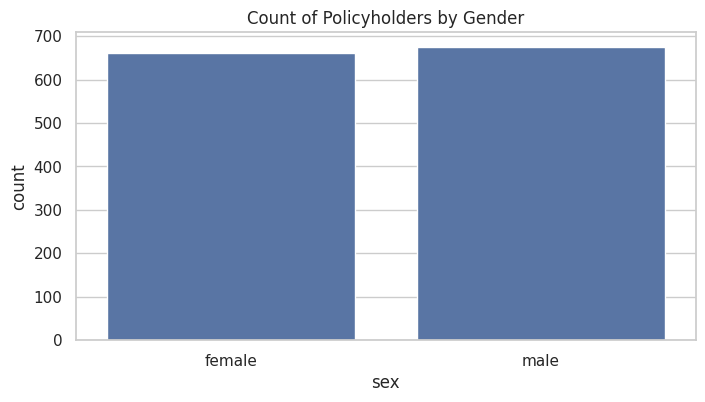

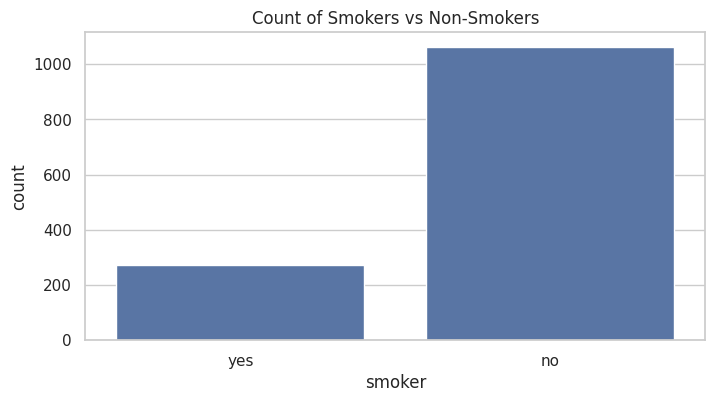

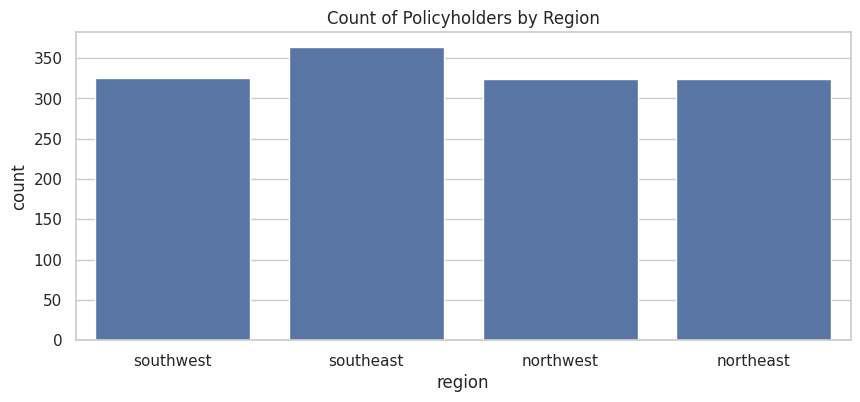

In [10]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Count plot for 'sex'
plt.figure(figsize=(8, 4))
sns.countplot(data=insurance_data, x='sex')
plt.title('Count of Policyholders by Gender')
plt.show()

# Count plot for 'smoker'
plt.figure(figsize=(8, 4))
sns.countplot(data=insurance_data, x='smoker')
plt.title('Count of Smokers vs Non-Smokers')
plt.show()

# Count plot for 'region'
plt.figure(figsize=(10, 4))
sns.countplot(data=insurance_data, x='region')
plt.title('Count of Policyholders by Region')
plt.show()

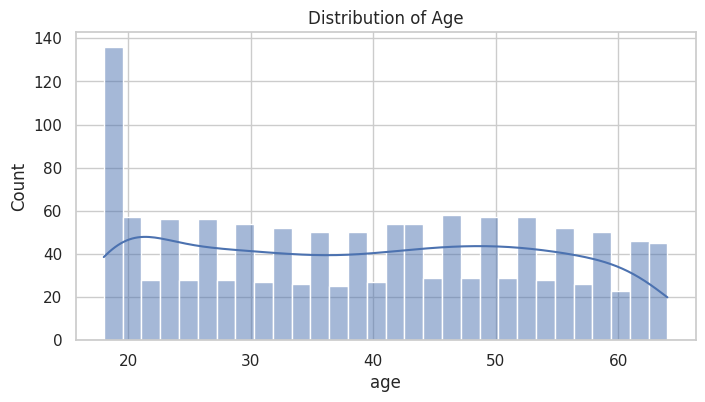

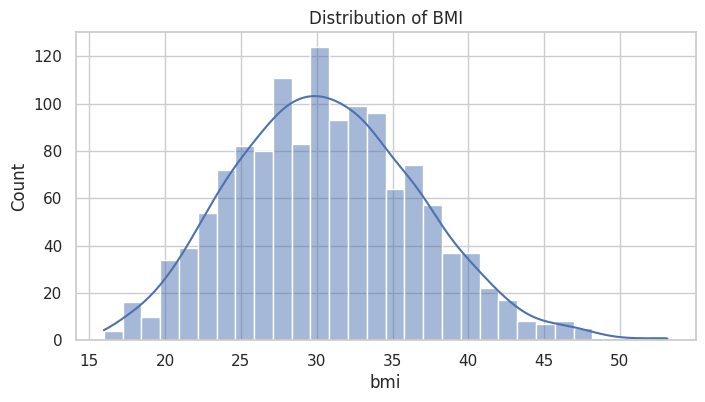

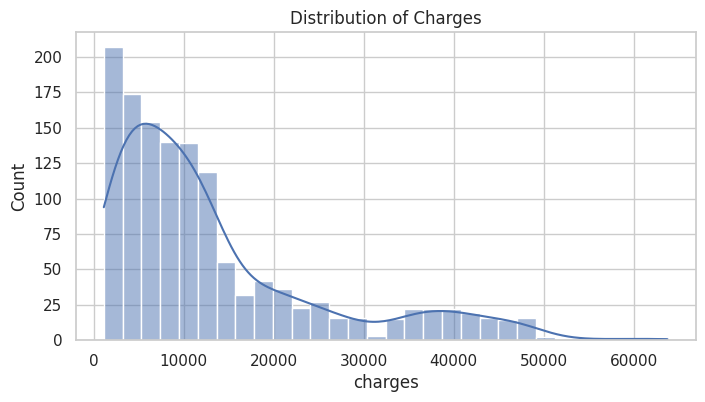

In [11]:
# Histogram for 'age'
plt.figure(figsize=(8, 4))
sns.histplot(insurance_data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Histogram for 'bmi'
plt.figure(figsize=(8, 4))
sns.histplot(insurance_data['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.show()

# Histogram for 'charges'
plt.figure(figsize=(8, 4))
sns.histplot(insurance_data['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.show()

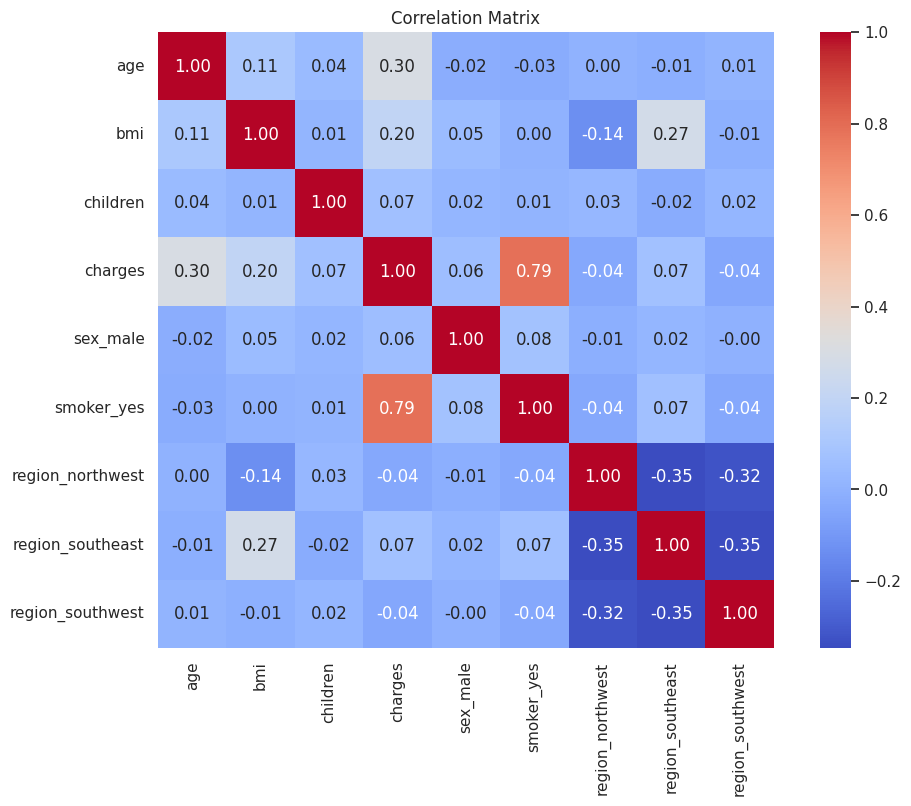

In [12]:
# Convert categorical variables to numerical for correlation analysis
insurance_data_encoded = pd.get_dummies(insurance_data, drop_first=True)

# Compute the correlation matrix
correlation_matrix = insurance_data_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

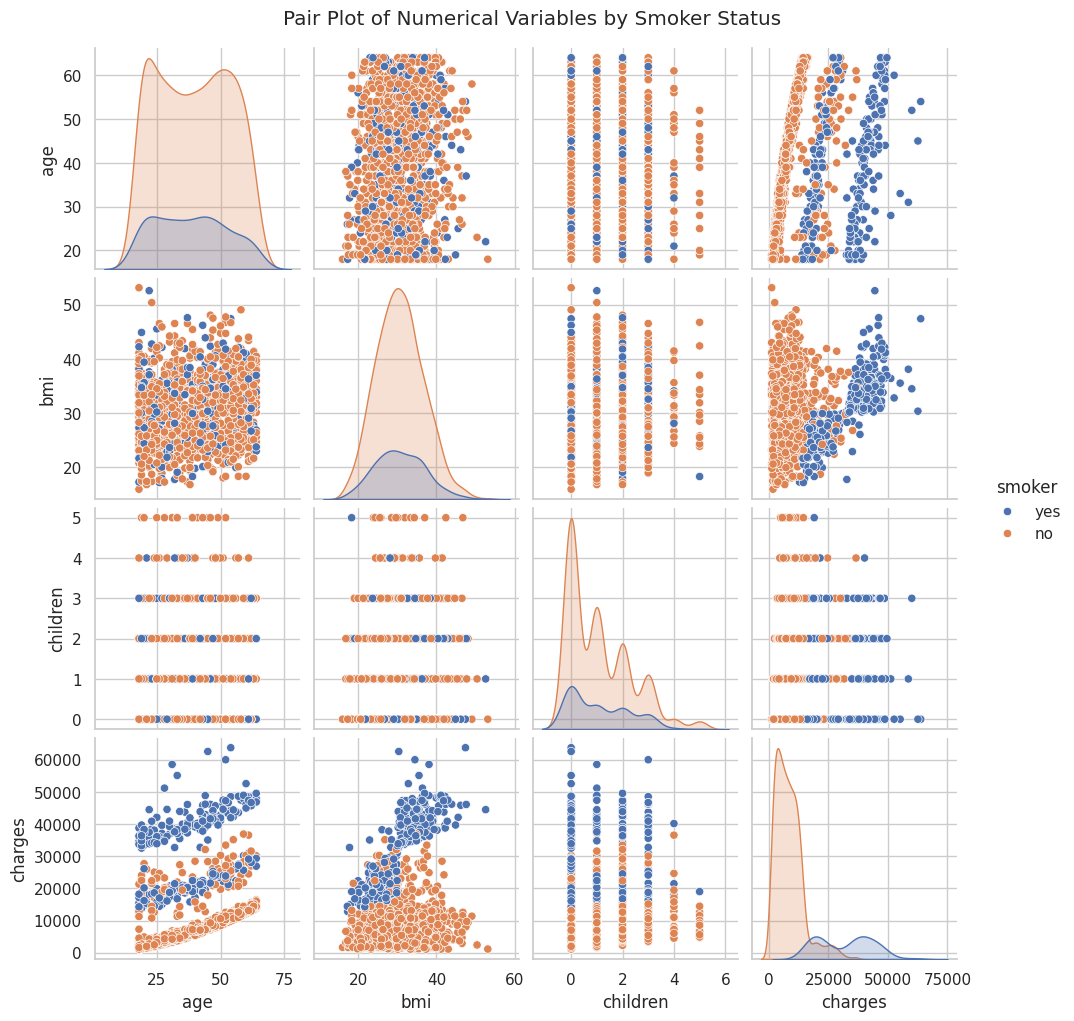

In [13]:
sns.pairplot(insurance_data, hue='smoker')
plt.suptitle('Pair Plot of Numerical Variables by Smoker Status', y=1.02)
plt.show()

In [16]:
# Grouping the data by smoking status
smoker_group = insurance_data.groupby('smoker')['charges']

# Perform ANOVA to check if there's a significant difference in charges between smokers and non-smokers
anova_result = stats.f_oneway(smoker_group.get_group('yes'), smoker_group.get_group('no'))

print("ANOVA Test for Smoking Status vs Charges:")
print(f"F-Statistic: {anova_result.statistic:.2f}")
print(f"P-Value: {anova_result.pvalue:.5f}")

# Interpretation
if anova_result.pvalue < 0.05:
    print("Smoking status is statistically significant in affecting the insurance premium charges.")
else:
    print("Smoking status is not statistically significant in affecting the insurance premium charges.")

ANOVA Test for Smoking Status vs Charges:
F-Statistic: 2175.74
P-Value: 0.00000
Smoking status is statistically significant in affecting the insurance premium charges.


In [17]:
# Correlation coefficients for Age, BMI with Charges
age_corr = insurance_data['age'].corr(insurance_data['charges'])
bmi_corr = insurance_data['bmi'].corr(insurance_data['charges'])

print(f"Pearson Correlation between Age and Charges: {age_corr:.2f}")
print(f"Pearson Correlation between BMI and Charges: {bmi_corr:.2f}")

# Interpretation
if abs(age_corr) > 0.3:
    print("Age is significantly correlated with the charges.")
else:
    print("Age is not significantly correlated with the charges.")

if abs(bmi_corr) > 0.3:
    print("BMI is significantly correlated with the charges.")
else:
    print("BMI is not significantly correlated with the charges.")

Pearson Correlation between Age and Charges: 0.30
Pearson Correlation between BMI and Charges: 0.20
Age is not significantly correlated with the charges.
BMI is not significantly correlated with the charges.


In [19]:
# Encode categorical variables
insurance_data_encoded = pd.get_dummies(insurance_data, drop_first=True)

# Define independent variables (X) and the dependent variable (y)
X = insurance_data_encoded.drop(columns=['charges'])
y = insurance_data_encoded['charges']

In [20]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for Lasso and Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
# Predictions
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Performance:")
print(f"MAE: {mae_linear:.2f}")
print(f"MSE: {mse_linear:.2f}")
print(f"R²: {r2_linear:.2f}")

Linear Regression Performance:
MAE: 4177.05
MSE: 35478020.68
R²: 0.81


In [23]:
# Lasso Regression Model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [24]:
# Predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Performance:")
print(f"MAE: {mae_lasso:.2f}")
print(f"MSE: {mse_lasso:.2f}")
print(f"R²: {r2_lasso:.2f}")


Lasso Regression Performance:
MAE: 4177.06
MSE: 35478753.18
R²: 0.81


In [25]:
# Ridge Regression Model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [26]:
# Predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Performance:")
print(f"MAE: {mae_ridge:.2f}")
print(f"MSE: {mse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")


Ridge Regression Performance:
MAE: 4177.30
MSE: 35481459.54
R²: 0.81


In [28]:
# Performance comparison
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'MAE': [mae_linear, mae_lasso, mae_ridge],
    'MSE': [mse_linear, mse_lasso, mse_ridge],
    'R²': [r2_linear, r2_lasso, r2_ridge]
})

print("\nModel Performance Comparison:")
print(results)


Model Performance Comparison:
               Model          MAE           MSE        R²
0  Linear Regression  4177.045561  3.547802e+07  0.806929
1   Lasso Regression  4177.062446  3.547875e+07  0.806925
2   Ridge Regression  4177.303400  3.548146e+07  0.806910


In [29]:
# Linear Regression coefficients
linear_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})

# Sorting features by their absolute values of coefficients
linear_coefficients['Abs_Coefficient'] = linear_coefficients['Coefficient'].abs()
linear_coefficients_sorted = linear_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print("\nKey Features Influencing Premiums (Linear Regression):")
print(linear_coefficients_sorted[['Feature', 'Coefficient']])


Key Features Influencing Premiums (Linear Regression):
            Feature  Coefficient
4        smoker_yes  9234.342487
0               age  3472.975553
1               bmi  1927.828251
2          children   636.501185
6  region_southeast  -371.780810
7  region_southwest  -284.610396
5  region_northwest  -168.944439
3          sex_male   -50.749675


In [30]:
# Lasso Regression coefficients
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
})

# Sorting features by their absolute values of coefficients
lasso_coefficients['Abs_Coefficient'] = lasso_coefficients['Coefficient'].abs()
lasso_coefficients_sorted = lasso_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print("\nKey Features Influencing Premiums (Lasso Regression):")
print(lasso_coefficients_sorted[['Feature', 'Coefficient']])


Key Features Influencing Premiums (Lasso Regression):
            Feature  Coefficient
4        smoker_yes  9234.229210
0               age  3472.901721
1               bmi  1927.670058
2          children   636.410030
6  region_southeast  -371.408182
7  region_southwest  -284.279634
5  region_northwest  -168.628008
3          sex_male   -50.633095


In [31]:
# Ridge Regression coefficients
ridge_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_model.coef_
})

# Sorting features by their absolute values of coefficients
ridge_coefficients['Abs_Coefficient'] = ridge_coefficients['Coefficient'].abs()
ridge_coefficients_sorted = ridge_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print("\nKey Features Influencing Premiums (Ridge Regression):")
print(ridge_coefficients_sorted[['Feature', 'Coefficient']])


Key Features Influencing Premiums (Ridge Regression):
            Feature  Coefficient
4        smoker_yes  9233.445514
0               age  3472.647320
1               bmi  1927.620713
2          children   636.480809
6  region_southeast  -371.591790
7  region_southwest  -284.536499
5  region_northwest  -168.911057
3          sex_male   -50.669879
